In [1]:
#Do not import any additional modules
import numpy as np
from PIL.Image import open
import matplotlib.pyplot as plt

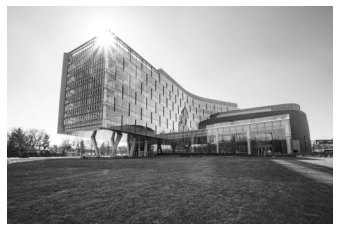

In [2]:
### Load, convert to grayscale, plot, and resave an image
I = np.array(open('Iribe.jpg').convert('L'))/255
plt.imshow(I,cmap='gray')
plt.axis('off')
plt.show()

plt.imsave('test.png',I,cmap='gray')

In [3]:
### Part 1
# 3.1 Gaussian Kernel
def gausskernel(sigma):
    #Create a 3*sigma x 3*sigma 2D Gaussian kernel
    h = np.zeros((3, 3))
    for i in range(3):
        for j in range(3):
            e = -(((i-1)**2 + (j-1)**2)/(2 * (sigma**2)))
            h[i, j] =  1/(2*np.pi * (sigma**2))*np.exp(e)
    sum = np.sum(h)
    h = h/sum
    return h

In [4]:
# 3.2 Convolution
def myfilter(I,h):
    #Appropriately pad I
    #Convolve I with h
    I_filtered=np.zeros(I.shape)
    row, col = h.shape
    a = np.ones(h.shape)
    k_center = (int(row/2), int(col/2)) #center of kernel
    values = np.zeros(h.shape)
    for i in range(len(I)):
        for j in range(len(I[i])):
            values = np.zeros(h.shape)
            for m in range(len(values)):
                for n in range(len(values[m])):
                    x = i - k_center[0] + m
                    y = j - k_center[1] + n
                    
                    if x >= 0 and y >= 0 and x < I.shape[0] and y < I.shape[1]:
                        abc = I[x][y]
                        defg = h[m][n]
                        values[m][n] = I[x][y] * h[m][n]

            I_filtered[i][j] = values.sum()
    return I_filtered

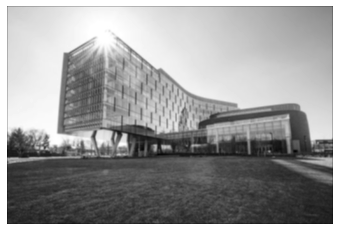

In [5]:
#sigma=3
plt.clf()
pic1 = myfilter(I, gausskernel(3))
plt.imshow(pic1,cmap='gray')
plt.axis('off')
plt.show()
plt.imsave('sig3.png',pic1,cmap='gray')

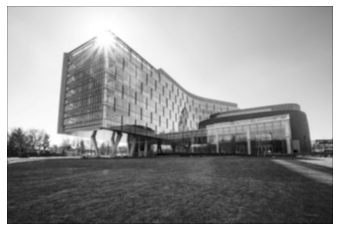

In [6]:
#sigma=5
plt.clf()
pic2 = myfilter(I, gausskernel(5))
plt.imshow(pic2,cmap='gray')
plt.axis('off')
plt.show()
plt.imsave('sig5.png',pic2,cmap='gray')

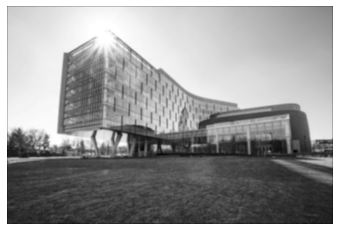

In [7]:
#sigma=10
plt.clf()
pic3 = myfilter(I, gausskernel(10))
plt.imshow(pic3,cmap='gray')
plt.axis('off')
plt.show()
plt.imsave('sig10.png',pic3,cmap='gray')

In [8]:
# 3.3 Filters
h1=np.array([[-1/9,-1/9,-1/9],[-1/9,2,-1/9],[-1/9,-1/9,-1/9]])
h2=np.array([[-1,3,-1]])
h3=np.array([[-1],[3],[-1]])

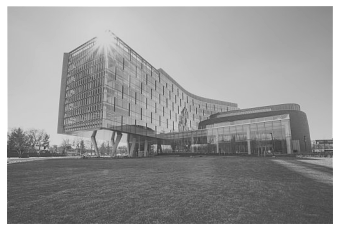

In [9]:
#h1
plt.clf()
h1_pic = myfilter(I, h1)
plt.imshow(h1_pic,cmap='gray')
plt.axis('off')
plt.show()
plt.imsave('h1_pic.png',h1_pic,cmap='gray')

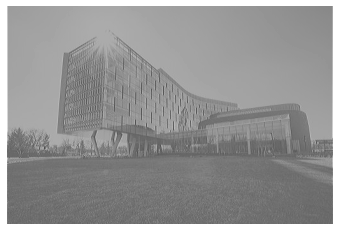

In [10]:
#h2
plt.clf()
h2_pic = myfilter(I, h2)
plt.imshow(h2_pic,cmap='gray')
plt.axis('off')
plt.show()
plt.imsave('h2_pic.png',h2_pic,cmap='gray')

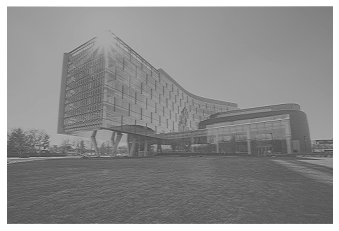

In [11]:
#h3
plt.clf()
h3_pic = myfilter(I, h3)
plt.imshow(h3_pic,cmap='gray')
plt.axis('off')
plt.show()
plt.imsave('h3_pic.png',h3_pic,cmap='gray')

In [12]:
### Part 2
Sx=np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
Sy=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
def myCanny(I,sigma=1,t_low=.5,t_high=1):
    #Smooth with gaussian kernel
    filter = gausskernel(sigma)
    gauss_graph = myfilter(I, filter)

    #Find img gradients
    dx = myfilter(gauss_graph, Sx)
    dy = myfilter(gauss_graph, Sy)
    d = np.hypot(dx, dy)
    theta = np.arctan2(dy, dx) * 180/np.pi
    theta_new = np.zeros(theta.shape)
    a, b = theta.shape #get row and col
    for i in range(a):
        for j in range(b):
            if theta[i][j] < 0:
                theta[i][j] += 180
            if (theta[i][j] < 22.5 and theta[i][j] >= 0) or (theta[i][j] >= 157.5 and theta[i][j] <= 180):
                theta_new[i][j] = 0
            elif(theta[i][j] < 67.5 and theta[i][j] >= 22.5):
                theta_new[i][j] = 45
            elif(theta[i][j] < 112.5 and theta[i][j] >= 67.5):
                theta_new[i][j] = 90
            elif(theta[i][j] < 157.5 and theta[i][j] >= 112.5):
                theta_new[i][j] = 135

    #Thin edges
    edge_graph = np.zeros(theta_new.shape)
    for i in range(a):
        for j in range(b):
            try:
                if theta_new[i][j] == 0:
                    if (d[i][j] >= d[i][j-1]) and (d[i][j] >= d[i][j+1]):
                        edge_graph[i][j] = d[i][j]
                elif theta_new[i][j] == 90:
                    if (d[i][j] >= d[i+1][j]) and (d[i][j] >= d[i-1][j]):
                        edge_graph[i][j] = d[i][j]
                elif theta_new[i][j] == 45:
                    if (d[i][j] >= d[i+1][j-1]) and (d[i][j] >= d[i-1][j+1]):
                        edge_graph[i][j] = d[i][j]
                elif theta_new[i][j] == 135:
                    if (d[i][j] >= d[i-1][j-1]) and (d[i][j] >= d[i+1][j+1]):
                        edge_graph[i][j] = d[i][j]

            except IndexError as e:
                pass


    #Hystersis thresholding
    myedges = np.zeros(I.shape)

    from scipy.ndimage.measurements import label
    l1, l2 = np.where(edge_graph >= t_low) #label
    h1, h2 = np.where(edge_graph >= t_high)
    w1, w2 = np.where((edge_graph < t_high) & (edge_graph >= t_low))
    label_arr = np.zeros(I.shape)
    label_arr[l1, l2] = 1

    s = np.ones((3,3))
    labeled, temp = label(label_arr, structure=s)
    h_label = []
    for i in range(len(h1)):
        v1 = h1[i]
        v2 = h2[i]
        h_label.append(labeled[v1, v2])
        myedges[v1, v2] = 1

    h_label = np.array(h_label)
    for i in range(len(w1)):
        v1 = w1[i]
        v2 = w2[i]
        w_label = labeled[v1, v2]
        if w_label in h_label:
            myedges[v1, v2] = 1


    return myedges

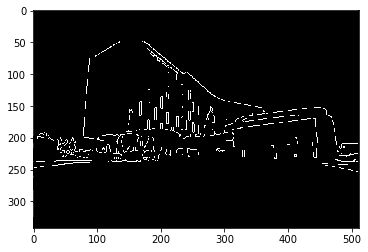

In [13]:
edges=myCanny(I,sigma=3,t_low=.5,t_high=1)
plt.clf()
plt.imshow(edges, interpolation='none',cmap='gray')
plt.show()
plt.imsave('canny1.png',edges, cmap='gray')

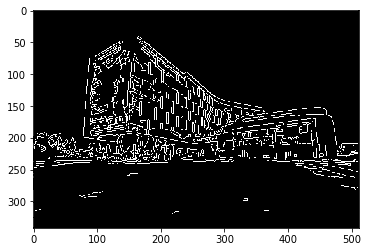

In [14]:
#testing
edges2=myCanny(I,sigma=3,t_low=.2,t_high=0.5)
plt.clf()
plt.imshow(edges2, interpolation='none',cmap='gray')
plt.show()
plt.imsave('canny2.png',edges2, cmap='gray')

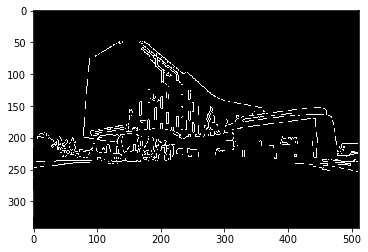

In [15]:
edges3=myCanny(I,sigma=3,t_low=.2,t_high=1)
plt.clf()
plt.imshow(edges3, interpolation='none',cmap='gray')
plt.show()
plt.imsave('canny3.png',edges3, cmap='gray')